
# Week 01 Assignment  
## Data Quality, Evaluation, Scaling, and Encoding

**Student name: Apra Rani Das**   

This is a small assignment that connects topics from Module 1, 2, and 3.  
You must complete it in this Colab notebook.

You will need to use concepts that appeared in the videos:
- Module 1 and 2: basic descriptive statistics, proportions, confusion matrix, accuracy, precision, recall
- Module 3: standardization, min max scaling, nominal vs ordinal, one hot encoding, ordinal encoding, Euclidean and Manhattan distance

Please do not use any extra libraries beyond `pandas`, `numpy`.



---
## 0. Setup and Dataset

We will use a dataset that should have columns given below:

- `user_id`  
- `age`  
- `monthly_income` (numeric)  
- `daily_screen_time_min` (numeric)  
- `daily_app_opens` (numeric)  
- `true_label` and `pred_label` for a binary classification task (0 or 1)  
- `satisfaction_level` (for example: `Low`, `Medium`, `High`)  
- `city_type` (for example: `Urban`, `Suburban`, `Rural`)


In [ ]:
# Cell 1: Imports
import pandas as pd
import numpy as np

In [ ]:
# Cell 2: Load the dataset (Already done for you)
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1OmDDCh4MD1TtvAemnwVDyz5zwCIXJ220")

# Show first few rows
df.head()

,user_id,age,monthly_income,daily_screen_time_min,daily_app_opens,true_label,pred_label,satisfaction_level,city_type
0,1,43,3734.19,109,48,0,0,Medium,Suburban
1,2,49,2594.19,194,7,0,0,Low,Urban
2,3,19,3550.47,146,36,1,0,High,Rural
3,4,19,3821.18,287,14,1,0,High,Suburban
4,5,63,1750.84,66,46,0,0,Medium,Suburban



### 0.1 Check your dataset

1. Confirm that the dataset loaded correctly.  
2. Check that you have at least these columns:  
   - numeric: `age`, `monthly_income`, `daily_screen_time_min`, `daily_app_opens`  
   - labels: `true_label`, `pred_label`  
   - categorical: `satisfaction_level`, `city_type`  



---
## Part A - Module 1 and 2 Review

In this part you will do simple descriptive statistics and basic classification evaluation.



### Q1. Descriptive statistics on a numeric feature

Choose one numeric column, for example `daily_screen_time_min`.


In [ ]:
# Q1.1: Choose your numeric column here [We already write this ans]
num_col = "daily_screen_time_min"

df[num_col].describe()

,daily_screen_time_min
count,100.000000
mean,181.890000
std,68.886951
min,60.000000
25%,122.000000
50%,178.000000
75%,243.750000
max,299.000000



> **Q1.2 Short answer: [Marks: 05]**  
> Look at the count, mean, min, max, and standard deviation for your chosen column.  
> In 2 to 3 sentences, comment on what you see.  
> For example, does the max look very far from the mean, or does it look quite close?

Write your answer here:

>  The dataset contains 100 complete observation for daily screen time, with an
average of 181.890000 min(approximately 182), and stander deviation of 68.886951 min(approximately 69), indicate moderat variability among users.

>  The range showing a wide spread of usage with minimum 60 min to maximum 299 min. Though maximum value is high, but it doesn't appear to be an extreme outlier cause it's about 1.7 standard deviation above the mean.

>  The median of 178 min is close to the mean, indicate the distribution is fairly symmetric without significant skew.


### Q2. Proportion of positive class

Use the `true_label` column, where 1 means "positive" and 0 means "negative".


In [ ]:
# Q2.1: Compute proportion of positive class [We already write this ans]
label_col = "true_label"

positive_count = (df[label_col] == 1).sum()
total_count = df.shape[0]
positive_proportion = positive_count / total_count

print("Positive count:", positive_count)
print("Total samples:", total_count)
print("Proportion of positive class:", positive_proportion)

Positive count: 52
Total samples: 100
Proportion of positive class: 0.52



> **Q2.2 Short answer: [5 marks]**  
> In 1 to 2 sentences, explain what this proportion tells you about your dataset.  
> For example, is the dataset balanced between 0 and 1, or is one class much more common?

Write your answer here:

>  The Proportion of 0.52 indicate that the dataset is fairly balanced between the positive (52%) and the negative (48%) classes, with only a little dominance of the positive class.

>  This near-evan split suggest that any machine learning models train on this data are less likely biased toward one class.




### Q3. Confusion matrix and basic metrics

For this question, use:
- `true_label` as the actual label  
- `pred_label` as the model prediction


In [ ]:
# Q3.1: Manually compute TP, TN, FP, FN [We already write this ans]
true_col = "true_label"
pred_col = "pred_label"

tp = ((df[true_col] == 1) & (df[pred_col] == 1)).sum()
tn = ((df[true_col] == 0) & (df[pred_col] == 0)).sum()
fp = ((df[true_col] == 0) & (df[pred_col] == 1)).sum()
fn = ((df[true_col] == 1) & (df[pred_col] == 0)).sum()

print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 28
TN: 27
FP: 21
FN: 24


In [ ]:
# Q3.2: Compute accuracy, precision, recall [We already write this ans]
accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.55
Precision: 0.5714285714285714
Recall: 0.5384615384615384



> **Q3.3 Short answer: [10 marks]**  
> In 3 to 4 sentences, briefly comment on the model using these three metrics.  
> For example, is the model catching most positives (high recall) or being careful when it predicts positive (high precision)?

Write your answer here:

>  Based on the metrics, the model's performance is quite poor. It has an accuracy of 55%, which is only slightly better than random guessing for this balanced dataset.

>  The precision of about 57% means that when the model predicts a positive case, it is correct just over half the time. While it is somewhat cautious, it still makes many false positive errors.

>  The recall of around 54% shows that it misses nearly half of the actual positive cases. This indicates that it is not very effective at identifying most positives.

>  Overall, the model performs moderately in detecting positives and avoiding false alarms. However, there is clear room for improvement in both precision and recall.


---
## Part B - Module 3: Scaling and Encoding

Now we will pick a few features and apply scaling and encoding.



### Q4. Standardization and Min max scaling

Use one numeric column, `monthly_income`.


In [ ]:
# Q4.1: Choose the numeric column [2 marks]
num_col = "monthly_income"
print("Numeric column selected:", num_col)

Numeric column selected: monthly_income


In [ ]:
# Q4.2: Standardization with z-score [10 marks]

values = df[num_col].astype(float)

# Compute mean and standard deviation
mean_val = values.mean()
std_val = values.std()

# Z-score standardization
z_scores = (values - mean_val) / std_val
print(f"Z-score standardized values: \n{z_scores}")

Z-score standardized values: 
0     0.944685
1    -0.324626
2     0.740126
3     1.041542
4    -1.263639
        ...   
95    1.213813
96    0.978734
97   -0.611613
98    0.135599
99   -0.768084
Name: monthly_income, Length: 100, dtype: float64


In [ ]:
z_scores.sample(15)

,monthly_income
80,-0.227747
10,-0.412699
25,-0.454308
87,0.047260
13,-0.529487
48,2.409081
59,-0.028832
96,0.978734
65,1.607744
67,-1.135639


In [ ]:
# Q4.3: Min max scaling implementation [10 marks]

# Compute min and max values
min_val = values.min()
max_val = values.max()

# Min-max scaling
minmax_scaled = (values - min_val) / (max_val - min_val)

print(f"Min-max scaled values: \n{minmax_scaled}")

Min-max scaled values: 
0     0.675209
1     0.393685
2     0.629839
3     0.696691
4     0.185420
        ...   
95    0.734899
96    0.682760
97    0.330034
98    0.495760
99    0.295330
Name: monthly_income, Length: 100, dtype: float64


In [ ]:
minmax_scaled.sample(15)

,monthly_income
46,0.505354
80,0.415173
43,0.710355
2,0.629839
55,0.659683
1,0.393685
97,0.330034
51,0.818331
63,0.368798
49,0.059555



> **Q4.4 Short answer: [3 marks]**  
> Compare the standardized and min max scaled columns in 2 to 3 sentences.  
> Mention what kind of range each one uses and how the numbers look.

Write your answer here:

>  The Z-score standardized values for monthly_income average around 0, with a standard deviation of 1. This results in a range that includes both negative and positive numbers. It shows how many standard deviations each value is from the mean.

>  In contrast, the min-max scaled values are adjusted to a fixed range between 0 and 1. This ensures all numbers are positive and scaled proportionally based on the original minimum and maximum.

>  Min-max scaling works well for algorithms that are sensitive to bounded inputs. On the other hand, standardization keeps the shape of the distribution but allows for negative values, which reflect relative positioning around the average.



### Q5. One hot and ordinal encoding

We will use:
- `city_type` as a nominal feature  
- `satisfaction_level` as an ordinal feature with order `Low` < `Medium` < `High`  


In [ ]:
# Q5.1: One hot encoding for city_type using pandas [10 marks]

city_dummies = pd.get_dummies(df["city_type"], prefix="city" ,dtype=int)
print(city_dummies)

    city_Rural  city_Suburban  city_Urban
0            0              1           0
1            0              0           1
2            1              0           0
3            0              1           0
4            0              1           0
..         ...            ...         ...
95           0              0           1
96           0              0           1
97           1              0           0
98           0              0           1
99           0              1           0

[100 rows x 3 columns]


In [ ]:
df["city_onehot"] = city_dummies.values.tolist()

print(df[["city_type", "city_onehot"]].sample(10))

   city_type city_onehot
7      Rural   [1, 0, 0]
58  Suburban   [0, 1, 0]
18     Urban   [0, 0, 1]
1      Urban   [0, 0, 1]
92     Rural   [1, 0, 0]
77     Rural   [1, 0, 0]
5      Rural   [1, 0, 0]
98     Urban   [0, 0, 1]
99  Suburban   [0, 1, 0]
19  Suburban   [0, 1, 0]


In [ ]:
# Q5.2: Attach one hot encoded columns to df [5 marks]

df_with_ohe = pd.concat([df, city_dummies], axis=1)
display(df_with_ohe)

,user_id,age,monthly_income,daily_screen_time_min,daily_app_opens,true_label,pred_label,satisfaction_level,city_type,city_onehot,city_Rural,city_Suburban,city_Urban
0,1,43,3734.19,109,48,0,0,Medium,Suburban,"[0, 1, 0]",0,1,0
1,2,49,2594.19,194,7,0,0,Low,Urban,"[0, 0, 1]",0,0,1
2,3,19,3550.47,146,36,1,0,High,Rural,"[1, 0, 0]",1,0,0
3,4,19,3821.18,287,14,1,0,High,Suburban,"[0, 1, 0]",0,1,0
4,5,63,1750.84,66,46,0,0,Medium,Suburban,"[0, 1, 0]",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,20,3975.90,259,15,0,1,Medium,Urban,"[0, 0, 1]",0,0,1
96,97,52,3764.77,295,16,1,0,Low,Urban,"[0, 0, 1]",0,0,1
97,98,35,2336.44,108,46,0,1,High,Rural,"[1, 0, 0]",1,0,0
98,99,18,3007.53,202,42,1,1,High,Urban,"[0, 0, 1]",0,0,1


In [ ]:
# Q5.3: Ordinal encoding for satisfaction_level [10 marks]

ordinal_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

df["satisfaction_encoded"] = df_with_ohe["satisfaction_level"].map(ordinal_map)

print(df[["satisfaction_level", "satisfaction_encoded"]])

   satisfaction_level  satisfaction_encoded
0              Medium                     2
1                 Low                     1
2                High                     3
3                High                     3
4              Medium                     2
..                ...                   ...
95             Medium                     2
96                Low                     1
97               High                     3
98               High                     3
99             Medium                     2

[100 rows x 2 columns]


In [ ]:
df.sample(10)

,user_id,age,monthly_income,daily_screen_time_min,daily_app_opens,true_label,pred_label,satisfaction_level,city_type,city_onehot,satisfaction_encoded
84,85,30,2076.24,112,43,1,1,Low,Urban,"[0, 0, 1]",1
15,16,49,1305.78,101,39,0,0,Low,Suburban,"[0, 1, 0]",1
70,71,19,2542.68,299,39,1,1,Medium,Rural,"[1, 0, 0]",2
86,87,25,4130.64,234,17,0,0,Low,Rural,"[1, 0, 0]",1
75,76,52,1766.18,280,5,0,0,Low,Urban,"[0, 0, 1]",1
58,59,23,1525.38,165,27,1,0,High,Suburban,"[0, 1, 0]",3
59,60,33,2859.85,200,15,1,1,High,Suburban,"[0, 1, 0]",3
49,50,24,1241.16,163,6,0,0,Medium,Rural,"[1, 0, 0]",2
63,64,59,2493.41,119,6,0,0,High,Suburban,"[0, 1, 0]",3
79,80,63,3405.65,152,22,0,0,Medium,Urban,"[0, 0, 1]",2



> **Q5.4 Short answer: [5 marks]**  
> In 2 to 3 sentences, explain why one hot encoding is suitable for `city_type`  
> and why ordinal encoding is suitable for `satisfaction_level`.

Write your answer here:

>  One-hot encoding is suitable for the "city_type" column because it represents nominal categories (e.g., urban, rural, suburban) with no inherent order or hierarchy, allowing machine learning models to treat each type as equally distinct without implying any ranking.

>   In contrast, ordinal encoding is appropriate for "satisfaction_level" as it captures ordered categories (e.g., low, medium, high), preserving the natural progression and relative importance between levels for algorithms to interpret meaningfully.

>   This distinction ensures that the encoding aligns with the data's intrinsic structure, preventing misleading assumptions in model training.



---
## Part C - Module 3: Distances between users

For this small part we will work with vectors based on scaled numeric features.



### Q6. Euclidean and Manhattan distance

Build 2D vectors for user 0 and user 1 using:
- `income_std`  
- `daily_app_opens` (or its min max scaled version if you prefer)


In [ ]:
# Q6.1: Build 2D vectors for first two users [We already write this ans]
vec_cols = ["monthly_income", "daily_app_opens"]

v1 = df.loc[0, vec_cols].values
v2 = df.loc[1, vec_cols].values

print("v1:", v1)
print("v2:", v2)

v1: [np.float64(3734.19) np.int64(48)]
v2: [np.float64(2594.19) np.int64(7)]


In [ ]:
# Q6.2: Euclidean distance computation [10 marks]

euclidean_dist = np.sqrt(np.sum((v1 - v2)**2))
print(f"Euclidean distance: {euclidean_dist}")

Euclidean distance: 1140.7370424422975


In [ ]:
# Q6.3: Manhattan distance computation [10 marks]

manhattan_dist = np.sum(np.abs(v1 - v2))
print(f"Manhattan distance: {manhattan_dist}")

Manhattan distance: 1181.0



> **Q6.4 Short answer: [5 marks]**  
> Which one is larger in your result, Euclidean or Manhattan distance  
> and why does that usually happen based on their formulas?

Write your answer here:

>  The Manhattan distance (1181.0) is larger than the Euclidean distance (1140.74)

>  **Based on their formulas**

* **Manhattan Distance ($L_1$ Norm):** This distance sums the absolute differences
along each dimension:


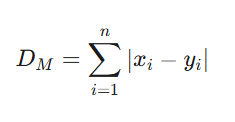

It represents movement along a grid (like navigating city blocks).

*  **Euclidean Distance ($L_2$ Norm):** This distance is the square root of the sum of the squared differences along each dimension:


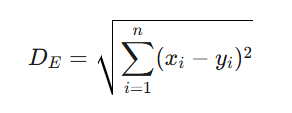

It represents the shortest, straight line between two points in space.


---
## Final Reflection [5 marks]

> In 4 to 6 sentences, describe how the three modules connect in this assignment.  
> Mention:
> - One idea from Module 1 or 2 that you used  
> - One idea from Module 3 that you used  
> - How these ideas together help you understand a dataset more deeply

Write your reflection here:

>  In this assignment, the three modules connect by providing a complete workflow for exploring, evaluating, and preparing data.


> In **Module 1,2**, I learned to select and organize data from a DataFrame and compute evaluation metrics like accuracy, precision, and recall to assess how well the data or model performs.

> In **Module 3**, I applied preprocessing techniques, such as one-hot encoding and scaling, along with distance metrics like Euclidean and Manhattan distances, to measure similarities between data points and normalize features.

> Together, these methods deepen my understanding of a dataset by combining raw value inspection, statistical evaluation, and structured transformation. This approach goes beyond basic summary statistics, allowing for effective analysis and comparison of both numeric and categorical features.

> Ultimately, it leads to more informed insights and decisions, turning a simple review of a dataset into a thorough analytical process.



## End of Assignment

Before submitting:
- Run all cells from top to bottom.  
- Check that all answer sections are filled.  
- Instruction video অনুযায়ী আমাদের দেয়া Colab ফাইলটি থেকে প্রথম একটি Save copy in drive করে নিবা। এরপর Google colab এর মধ্যে কোডগুলো করবে এবং সেই ফাইলটি ‘Anyone with the link’ & ‘View’ Access দিয়ে ফাইলটির Shareble Link টি সাবমিট করবে।
